<a href="https://colab.research.google.com/github/alexandrosnic/fastai_course/blob/main/MNIST_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [114]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [115]:
path = untar_data(URLs.MNIST_SAMPLE)

In [116]:
#hide
Path.BASE_PATH = path

In [117]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [118]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [119]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [120]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [121]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [122]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [123]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [195]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)
# three_tensors[:2]

(6131, 6265)

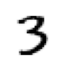

In [125]:
show_image(three_tensors[1]);

In [201]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
# stacked_threes.shape
torch.stack(three_tensors)[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  

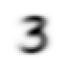

In [127]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

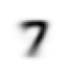

In [128]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

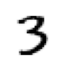

In [129]:
a_3 = stacked_threes[1]
show_image(a_3);

In [130]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [131]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [132]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [133]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [134]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [135]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1417, 0.1244, 0.1115,  ..., 0.1228, 0.1111, 0.1295]),
 torch.Size([1010]))

In [136]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [137]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [138]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [139]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [140]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [141]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [142]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [143]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [144]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [145]:
weights = init_params((28*28,1))

In [146]:
bias = init_params(1)

In [147]:
(train_x[0]*weights.T).sum() + bias

tensor([11.5725], grad_fn=<AddBackward0>)

In [148]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)

In [149]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [False],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [150]:
corrects.float().mean().item()

0.7086963653564453

In [151]:
with torch.no_grad(): weights[0] *= 1.0001

In [152]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.7086963653564453

In [153]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [154]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [155]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [156]:
weights = init_params((28*28,1))
bias = init_params(1)

In [157]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [158]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [159]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [160]:
preds = linear1(batch)
preds

tensor([[15.7982],
        [16.6009],
        [ 7.9966],
        [23.5645]], grad_fn=<AddBackward0>)

In [161]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(8.4192e-05, grad_fn=<MeanBackward0>)

In [162]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-1.2072e-05), tensor([-8.4163e-05]))

In [163]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [164]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-2.4144e-05), tensor([-0.0002]))

In [165]:
weights.grad.zero_()
bias.grad.zero_();

In [166]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [167]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [168]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [169]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [170]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [171]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6961

In [172]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8558 0.9051 0.9281 0.9408 0.9505 0.9539 0.9554 0.9579 0.9618 0.9628 0.9637 0.9652 0.9657 0.9666 0.9686 0.9696 0.9711 0.9711 0.9706 0.9711 

In [173]:
linear_model = nn.Linear(28*28,1)

In [174]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [175]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [176]:
opt = BasicOptim(linear_model.parameters(), lr)

In [177]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [178]:
validate_epoch(linear_model)

0.5405

In [179]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [180]:
train_model(linear_model, 20)

0.4932 0.707 0.8696 0.9194 0.9374 0.9506 0.9574 0.9648 0.9662 0.9677 0.9701 0.9721 0.9736 0.975 0.976 0.977 0.9775 0.9779 0.9779 0.9779 

In [181]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8364 0.8374 0.9111 0.933 0.9482 0.9565 0.9618 0.9653 0.9672 0.9692 0.9716 0.9736 0.975 0.9755 0.9765 0.9775 0.9779 0.9784 0.9784 

In [182]:
dls = DataLoaders(dl, valid_dl)

In [183]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [184]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637086,0.503244,0.495584,00:00
1,0.438342,0.251897,0.771835,00:00
2,0.164372,0.164397,0.852797,00:00
3,0.073829,0.101437,0.915113,00:01
4,0.040375,0.075321,0.933759,00:00
5,0.027236,0.060833,0.947498,00:00
6,0.021788,0.051709,0.957802,00:00
7,0.019334,0.045596,0.963690,00:00
8,0.018067,0.041281,0.965653,00:00
9,0.017290,0.038092,0.968106,00:00


In [185]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [186]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [187]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [188]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [189]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.327098,0.412818,0.505888,00:00
1,0.151854,0.240211,0.791462,00:00
2,0.083889,0.119756,0.911678,00:00
3,0.054825,0.080089,0.939156,00:00
4,0.041339,0.062225,0.954367,00:00
5,0.034467,0.052265,0.962709,00:00
6,0.030537,0.045994,0.965653,00:01
7,0.027993,0.041715,0.966143,00:01
8,0.026164,0.038602,0.967615,00:01
9,0.024749,0.036225,0.970559,00:00


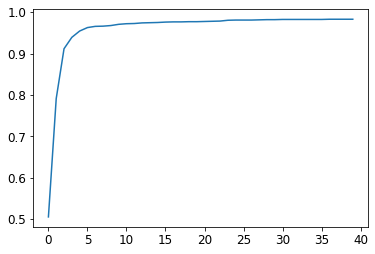

In [190]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [191]:
learn.recorder.values[-1][2]

0.982826292514801

# Calculate the accuracy of our learning function

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# Declare the path for MNIST
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# Create a list of the path of every image
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

# Create a list of tensors for 3s and 7s (contains the 
# pixel value of each pixel of every image)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

# Stack all these tensors into one single tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# Create the tensors for the validation 3s and 7s
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

valid_3_dist = mnist_distance(valid_3_tens, mean3)

def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

# SGD - Calculate the gradient

In [ ]:
# SGD

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# Declare the path for MNIST
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# Create a list of the path of every image
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

# Create a list of tensors for 3s and 7s (contains the 
# pixel value of each pixel of every image)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

# Stack all these tensors into one single tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# Create the tensors for the validation 3s and 7s
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

# Concatenates threes and sevens into train_x along with their y, and creates
# a dataset
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
# This creates a new tensor of one-dimensional y, of length 3s and 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

# Concatenates the validations threes and sevens into train_x along with their y, 
# and creates a dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


# SGD in action
# 1. Initialize the weights
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)

# 2. Calculate the predictions
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)

# 3. Calculate the loss
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x): return 1/(1+torch.exp(-x))

# 4. Calculate the gradient

# Define the batch size:
# Dataloader takes the dataset and splits it into smaller datasets of the batch size
# For example if it's a dataset of 1024 items, then it will create 4 lists of 256
# items
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
valid_dl = DataLoader(valid_dset, batch_size=256)

batch = train_x[:4]
preds = linear1(batch)
loss = mnist_loss(preds, train_y[:4])
loss.backward()


# SGD - Train for one epoch

In [ ]:
# SGD

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# Declare the path for MNIST
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# Create a list of the path of every image
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

# Create a list of tensors for 3s and 7s (contains the 
# pixel value of each pixel of every image)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

# Stack all these tensors into one single tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# Create the tensors for the validation 3s and 7s
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

# Concatenates threes and sevens into train_x along with their y, and creates
# a dataset
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
# This creates a new tensor of one-dimensional y, of length 3s and 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

# Concatenates the validations threes and sevens into train_x along with their y, 
# and creates a dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


# SGD in action
# 1. Initialize the weights
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)

# 2. Calculate the predictions
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)

# 3. Calculate the loss
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x): return 1/(1+torch.exp(-x))

# 4. Calculate the gradient
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

weights.grad.zero_()
bias.grad.zero_();

# 5. Change the weights and biases based on the gradients (optimization step)
# for an epoch
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

# Calculate the validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# Put all the batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

# Train for one epoch
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)


# SGD Train for all the epochs

Added the `train_model` function

In [ ]:
# SGD

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# Declare the path for MNIST
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# Create a list of the path of every image
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

# Create a list of tensors for 3s and 7s (contains the 
# pixel value of each pixel of every image)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

# Stack all these tensors into one single tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# Create the tensors for the validation 3s and 7s
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

# Concatenates threes and sevens into train_x along with their y, and creates
# a dataset
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
# This creates a new tensor of one-dimensional y, of length 3s and 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

# Concatenates the validations threes and sevens into train_x along with their y, 
# and creates a dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


# SGD in action
# 1. Initialize the weights
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
# Same as these two together:
# def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
# def linear1(xb): return xb@weights + bias

# 2. Calculate the predictions (in step)
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

opt = BasicOptim(linear_model.parameters(), lr)

# 3. Calculate the loss
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x): return 1/(1+torch.exp(-x))

# 4. Calculate the gradient
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()


# 5. Change the weights and biases based on the gradients (optimization step)
# for an epoch (changed the function to use the BasicOptim class)
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

# Calculate the validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# Put all the batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

# 6. Repeat the process for all the epochs:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

train_model(linear_model, 20)

# Use fastai's learner

Learner replaces `train_model`, `validate_epoch`, `train_epoch` and `calc_grad`:


```
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr=lr)
```

0.4932 0.8217 0.8486 0.914 0.934 0.9492 0.956 0.9623 0.9657 0.9672 0.9696 0.9711 0.9736 0.975 0.976 0.977 0.9775 0.9779 0.9784 0.9784 

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637292,0.503774,0.495584,00:00
1,0.631573,0.498075,0.495584,00:00
2,0.280626,0.327948,0.662414,00:00
3,0.117879,0.152354,0.866045,00:00
4,0.057660,0.096678,0.918548,00:00
5,0.034451,0.072876,0.936703,00:00
6,0.025024,0.059452,0.950932,00:00
7,0.020961,0.050876,0.958292,00:00
8,0.019026,0.045061,0.964181,00:00
9,0.017956,0.040918,0.966143,00:00


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.349574,0.404705,0.504907,00:00
1,0.157821,0.241263,0.791953,00:00
2,0.085552,0.118479,0.913150,00:00
3,0.055210,0.079282,0.941119,00:00
4,0.041363,0.061773,0.953876,00:00
5,0.034407,0.051970,0.963199,00:00
6,0.030470,0.045816,0.965162,00:00
7,0.027941,0.041622,0.966143,00:00
8,0.026130,0.038575,0.968597,00:00
9,0.024732,0.036249,0.969578,00:00


0.982826292514801

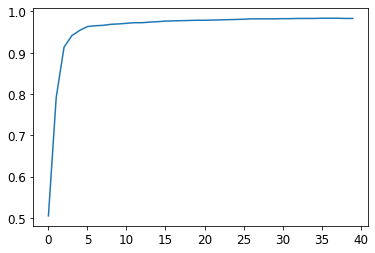

In [202]:
# SGD
# Instead of the BasicOptim class, use fastai's SGD

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# Declare the path for MNIST
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# Create a list of the path of every image
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

# Create a list of tensors for 3s and 7s (contains the 
# pixel value of each pixel of every image)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

# Stack all these tensors into one single tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# Create the tensors for the validation 3s and 7s
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

# Concatenates threes and sevens into train_x along with their y, and creates
# a dataset
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
# This creates a new tensor of one-dimensional y, of length 3s and 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

# Concatenates the validations threes and sevens into train_x along with their y, 
# and creates a dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


# SGD in action
# 1. Initialize the weights
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)
dls = DataLoaders(dl, valid_dl)
# linear_model replaces init_params and linear1 

# 2. Calculate the predictions (in step)

# It replaces BasicOptim
opt = SGD(linear_model.parameters(), lr)

# 3. Calculate the loss
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x): return 1/(1+torch.exp(-x))

# Calculate the validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# 4. Calculate the gradient
# 5. Change the weights and biases based on the gradients (optimization step)
# 6. Repeat the process for all the epochs
# 7. Iterate until it's good enough
# Learner replaces train_model, validate_epoch, train_epoch and calc_grad
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr=lr)


# Add non-linearity

Use `nn.Sequential` to replace:


```
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)
```



In [ ]:
# SGD
# Add non-linearity

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# Declare the path for MNIST
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# Create a list of the path of every image
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

# Create a list of tensors for 3s and 7s (contains the 
# pixel value of each pixel of every image)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

# Stack all these tensors into one single tensor
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# Create the tensors for the validation 3s and 7s
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

# Concatenates threes and sevens into train_x along with their y, and creates
# a dataset
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
# This creates a new tensor of one-dimensional y, of length 3s and 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

# Concatenates the validations threes and sevens into train_x along with their y, 
# and creates a dataset
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))


# SGD in action
# 1. Initialize the weights
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)
dls = DataLoaders(dl, valid_dl)
# linear_model replaces init_params and linear1 

# 2. Calculate the predictions (in step)

# It replaces BasicOptim
opt = SGD(linear_model.parameters(), lr)

# 3. Calculate the loss
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x): return 1/(1+torch.exp(-x))

# Calculate the validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# 4. Calculate the gradient
# 5. Change the weights and biases based on the gradients (optimization step)
# 6. Repeat the process for all the epochs
# 7. Iterate until it's good enough
# Learner replaces train_model, validate_epoch, train_epoch and calc_grad

# nn.Sequential replaces:
# def simple_net(xb): 
#     res = xb@w1 + b1
#     res = res.max(tensor(0.0))
#     res = res@w2 + b2
#     return res

# w1 = init_params((28*28,30))
# b1 = init_params(30)
# w2 = init_params((30,1))
# b2 = init_params(1)
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)
plt.plot(L(learn.recorder.values).itemgot(2));
learn.recorder.values[-1][2]